In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Task 1: Load and Inspect the Data 

In [264]:
df=pd.read_csv(r'C:\Users\Hp\python TSC Trainnig\Hakathon-5\heart.csv')

In [265]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [267]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


Check the distribution of the target variable (Target). 

In [268]:
df['AHD'].value_counts()# i used AHD in place of target. Target: Whether the patient has heart disease (1 = yes, 0 = no).

AHD
No     164
Yes    139
Name: count, dtype: int64

Task 2: Data Cleaning and Preprocessing 

In [269]:
#Handle Missing Data: 
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [270]:
df.dropna(inplace=True)

Feature Engineering
Convert categorical variables like Sex, ChestPainType, RestingECG, etc., 
into numeric format using encoding (e.g., one-hot encoding or label 
encoding).

In [271]:
df['Sex'] = df['Sex'].map({1: 'Male', 0: 'Female'})

In [272]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['RestBP', 'Chol', 'MaxHR']] = scaler.fit_transform(df[['RestBP', 'Chol', 'MaxHR']])

In [273]:
df['ExerciseHeartStress'] = df['Oldpeak'] * df['Slope']

In [274]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD',
       'ExerciseHeartStress'],
      dtype='object')

Task 3: Exploratory Data AnalysisTask 

 Plot the distribution of key numerical features (e.g., Age, Cholesterol, 
MaxHR) using histograms or boxplots. 

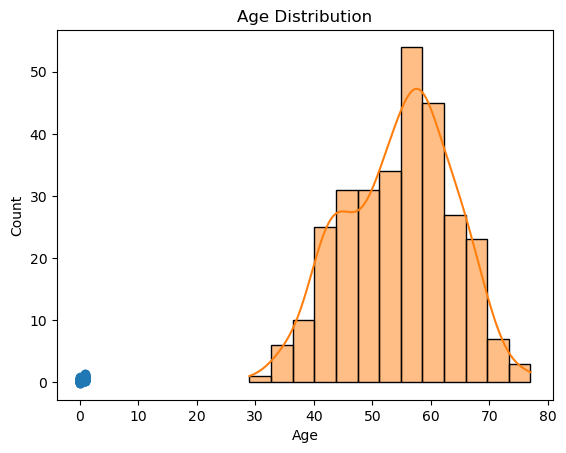

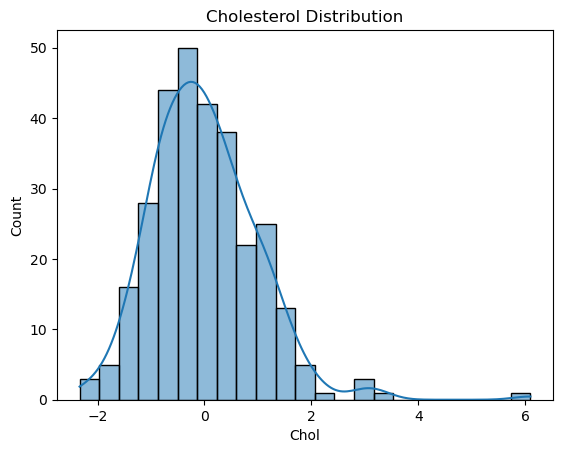

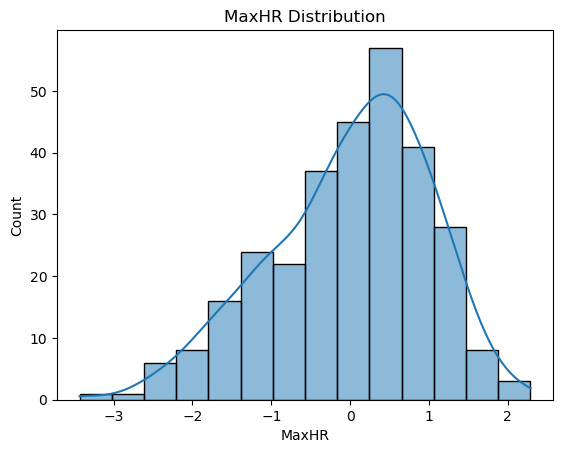

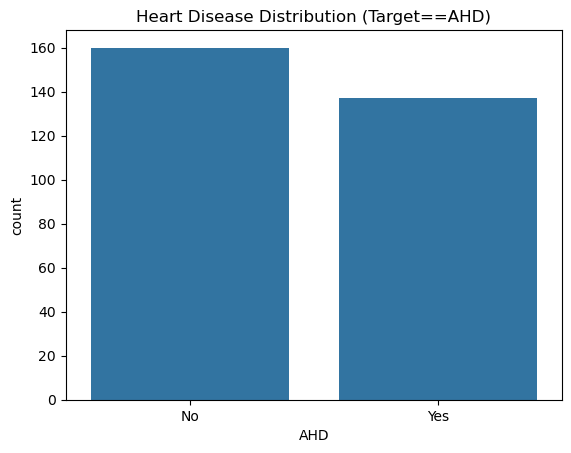

In [275]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Chol'], kde=True)
plt.title('Cholesterol Distribution')
plt.show()

sns.histplot(df['MaxHR'], kde=True)
plt.title('MaxHR Distribution')
plt.show()

sns.countplot(x='AHD', data=df)
plt.title('Heart Disease Distribution (Target==AHD)')
plt.show()

 Bivariate Analysis: 
o Explore the relationship between the target variable (Target) and other 
features: 
 Use a count plot or bar plot for categorical features like Sex, 
ChestPainType, FBS, ExerciseAngina. 
 Use a boxplot or violin plot for numerical features like Age, 
Cholesterol, MaxHR to see how they relate to heart disease 
presence. 
 Correlation matrix to explore relationships between numeric 
features. 

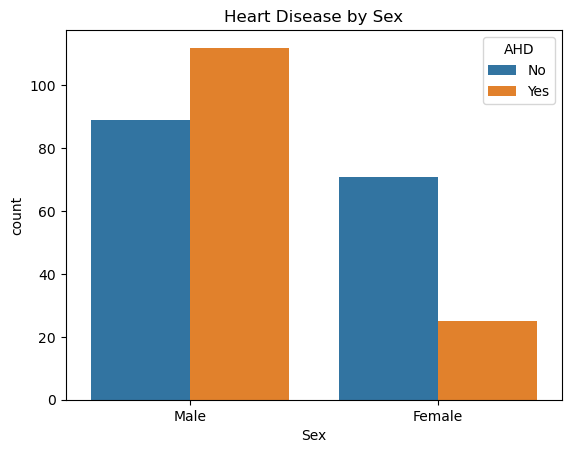

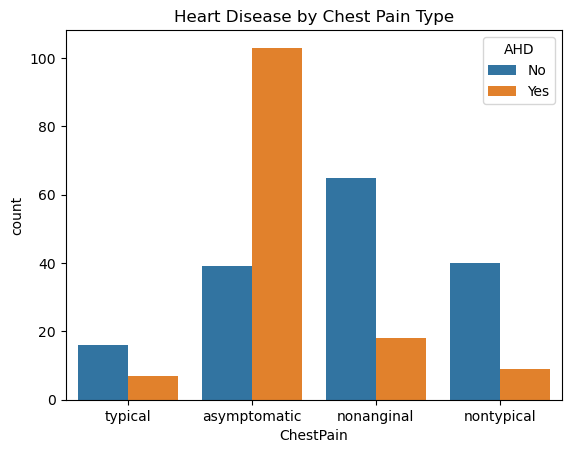

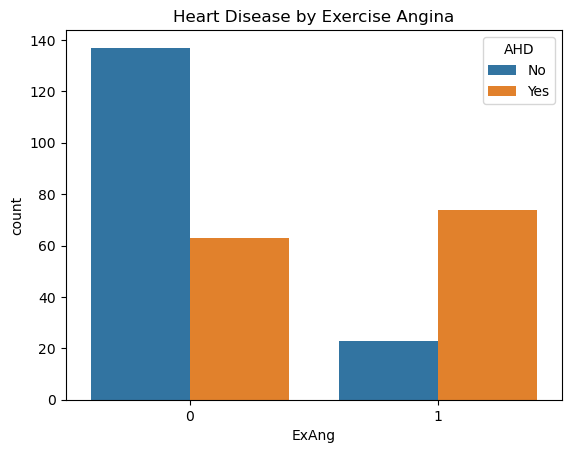

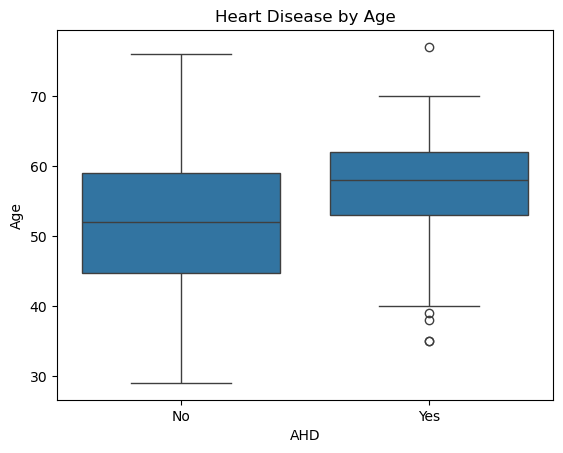

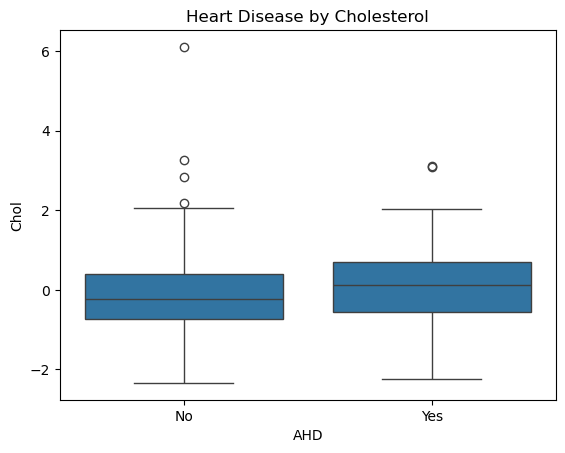

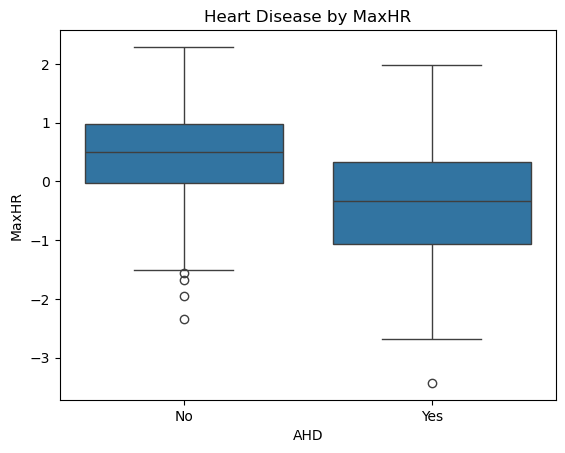

In [276]:
sns.countplot(x='Sex', hue='AHD', data=df)
plt.title('Heart Disease by Sex')
plt.show()
sns.countplot(x='ChestPain', hue='AHD', data=df)
plt.title('Heart Disease by Chest Pain Type')
plt.show()

sns.countplot(x='ExAng', hue='AHD', data=df)
plt.title('Heart Disease by Exercise Angina')
plt.show()

# Boxplot for numerical features vs. Target
sns.boxplot(x='AHD', y='Age', data=df)
plt.title('Heart Disease by Age')
plt.show()

sns.boxplot(x='AHD', y='Chol', data=df)
plt.title('Heart Disease by Cholesterol')
plt.show()

sns.boxplot(x='AHD', y='MaxHR', data=df)
plt.title('Heart Disease by MaxHR')
plt.show()





Visualizing correlations: 


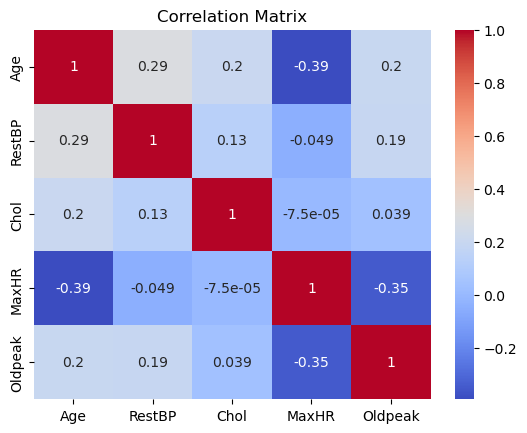

In [277]:
# Correlation matrix for numerical features
corr = df[['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Task 4: Aggregation and Insights 
 Use groupby to find the survival rate (presence of heart disease) by diAerent 
categories: 
o Survival by gender (Male vs Female). 
o Survival by chest pain type (ChestPainType). 
o Survival by maximum heart rate achieved (MaxHR). 
 Calculate average cholesterol levels for people with and without heart disease, 
and compare these across categories (e.g., ChestPainType).

In [278]:
df['AHD'] = df['AHD'].map({'Yes': 1, 'No': 0})

In [279]:
# Survival rate by gender
df.groupby('Sex')['AHD'].mean()

Sex
Female    0.260417
Male      0.557214
Name: AHD, dtype: float64

In [280]:
df.groupby('ChestPain')['AHD'].mean()

ChestPain
asymptomatic    0.725352
nonanginal      0.216867
nontypical      0.183673
typical         0.304348
Name: AHD, dtype: float64

In [281]:
df.groupby('MaxHR')['AHD'].mean().head(10) 

MaxHR
-3.431849    1.000000
-2.689585    1.000000
-2.602260    1.000000
-2.383947    1.000000
-2.340285    0.500000
-2.296622    1.000000
-2.209297    1.000000
-2.034647    1.000000
-1.947322    0.666667
-1.903659    1.000000
Name: AHD, dtype: float64

In [282]:
df.groupby('AHD')['Chol'].mean()

AHD
0   -0.074291
1    0.086763
Name: Chol, dtype: float64

Task 5: Derive Medical Insights 
 Investigate the data set and come up with at least 5 diAerent insights with proof 
 Prepare a dashboard for your findings

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [284]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ExerciseHeartStress
0,1,63,Male,typical,0.750380,-0.276443,1,2,0.017494,0,2.3,3,0.0,fixed,0,6.9
1,2,67,Male,asymptomatic,1.596266,0.744555,0,2,-1.816334,1,1.5,2,3.0,normal,1,3.0
2,3,67,Male,asymptomatic,-0.659431,-0.353500,0,2,-0.899420,1,2.6,2,2.0,reversable,1,5.2
3,4,37,Male,nonanginal,-0.095506,0.051047,0,0,1.633010,0,3.5,3,0.0,normal,0,10.5
4,5,41,Female,nontypical,-0.095506,-0.835103,0,2,0.978071,0,1.4,1,0.0,normal,0,1.4


In [285]:
target =  "AHD" 
y = df[ "AHD" ]
y.head()


0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [286]:
#Get the predictor columns
droplist = [target, 'ChestPain', 'Thal', 'Sex']
predictors = df.drop(droplist, axis=1).columns
X = df[predictors]
X.head()

,Unnamed: 0,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ExerciseHeartStress
0,1,63,0.750380,-0.276443,1,2,0.017494,0,2.3,3,0.0,6.9
1,2,67,1.596266,0.744555,0,2,-1.816334,1,1.5,2,3.0,3.0
2,3,67,-0.659431,-0.353500,0,2,-0.899420,1,2.6,2,2.0,5.2
3,4,37,-0.095506,0.051047,0,0,1.633010,0,3.5,3,0.0,10.5
4,5,41,-0.095506,-0.835103,0,2,0.978071,0,1.4,1,0.0,1.4


In [287]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [288]:
y_test.head()

169    0
214    1
63     0
155    1
5      0
Name: AHD, dtype: int64

In [289]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-1.36184682e-04, -4.14107844e-03,  6.41182456e-02,  1.87993002e-02,
       -1.49346874e-01,  1.38870216e-02, -9.47231592e-02,  2.10934678e-01,
        5.51634114e-02,  1.36904390e-02,  2.03239495e-01,  3.74983724e-03])

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([ 0.17449157,  0.26328654, -0.0084144 ,  1.10444772,  0.07572968,
        0.60616407,  0.43490886,  0.33937126,  0.51858974,  0.33351099,
        0.25864697,  0.13692881,  0.05220979,  0.37403337,  0.62619545,
        0.05643193,  0.11059628,  0.18120668,  0.383091  ,  0.23472146,
        0.5282086 ,  0.4388982 ,  0.55167233,  0.2482919 ,  0.77831552,
        0.12558831,  0.91888154,  0.25864679,  0.25379048,  0.0855427 ,
       -0.00291334, -0.04210051,  1.03425953,  0.2028404 ,  0.37524006,
        0.35790743,  0.31749478,  0.10323413,  1.32371395,  0.50257494,
        0.21213421,  0.80358117,  0.58351211,  0.79532713,  0.16103742,
        0.5194751 ,  0.40353111,  1.18487888,  0.50498938,  0.18471222,
        0.10011147,  0.64697788,  0.24812959,  0.25070982,  0.84214741,
        0.5234484 ,  0.2412338 ,  0.31142216,  0.86268683,  0.68453608,
        0.24246758,  0.16893034,  0.66895356,  0.26408855,  0.06646038,
        0.43429499,  0.55711136,  0.02489931,  0.98729002,  0.55

In [295]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Unnamed: 0,-0.000136
Age,-0.004141
RestBP,0.064118
Chol,0.018799
Fbs,-0.149347
RestECG,0.013887
MaxHR,-0.094723
ExAng,0.210935
Oldpeak,0.055163
Slope,0.013690
